## 用矩阵运算实现图像放射变换

![](resources/affine-transform.png)

In [1]:
!pip install opencv-python face-recognition

^C


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
guido = plt.imread('resources/guido.jpg')
guido.shape

(750, 500, 3)

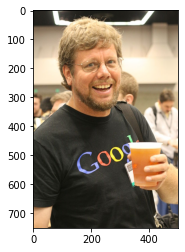

In [4]:
plt.imshow(guido)

In [5]:
def basic_matrix(translation):
    """基础变换矩阵"""
    return np.array([[1, 0, translation[0]], [0, 1, translation[1]], [0, 0, 1]])

In [6]:
import copy

def adjust_transform_for_image(img, trans_matrix):
    """根据图像调整变换矩阵"""
    transform_matrix = copy.deepcopy(trans_matrix)
    height, width, channels = img.shape
    transform_matrix[0:2, 2] *= [width, height]
    center = np.array((0.5 * width, 0.5 * height))
    return basic_matrix(center) @ transform_matrix @ basic_matrix(-center)

In [7]:
def apply_transform(img, transform, border_value=(204, 204, 204)):
    """仿射变换"""
    return cv2.warpAffine(
        img, transform[:2, :],
        dsize=(img.shape[1], img.shape[0]),
        flags=cv2.INTER_LINEAR,
        borderMode=cv2.BORDER_CONSTANT,
        borderValue=border_value
    )

In [8]:
def apply(img, trans_matrix):
    """应用变换"""
    temp_matrix = adjust_transform_for_image(img, trans_matrix)
    out_img = apply_transform(img, temp_matrix)
    return out_img

In [9]:
def scale(img, x_ratio, y_ratio):
    """缩放"""
    scale_matrix = np.array([
        [x_ratio, 0, 0], 
        [0, y_ratio, 0], 
        [0, 0, 1]
    ])
    return apply(img, scale_matrix)

In [10]:
def rotate(img, degree):
    """旋转"""
    angle = degree / 180 * np.pi
    rotate_matrix = np.array([
        [np.cos(angle), -np.sin(angle), 0], 
        [np.sin(angle), np.cos(angle), 0], 
        [0, 0, 1]
    ])
    return apply(img, rotate_matrix)

In [11]:
def transvect(img, ratio):
    """剪切影射"""
    transvect_matrix = np.array([
        [1, ratio, 0],
        [0, 1, 0],
        [0, 0, 1]
    ])
    return apply(img, transvect_matrix)

    ERROR: Command errored out with exit status 1:
     command: 'd:\programs\python\python38\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\zs\\AppData\\Local\\Temp\\pip-install-40lccyeu\\dlib_d6f88d071a1e4bca844143166bd00c0d\\setup.py'"'"'; __file__='"'"'C:\\Users\\zs\\AppData\\Local\\Temp\\pip-install-40lccyeu\\dlib_d6f88d071a1e4bca844143166bd00c0d\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record 'C:\Users\zs\AppData\Local\Temp\pip-record-mt1d8xvx\install-record.txt' --single-version-externally-managed --compile --install-headers 'd:\programs\python\python38\Include\dlib'
         cwd: C:\Users\zs\AppData\Local\Temp\pip-install-40lccyeu\dlib_d6f88d071a1e4bca844143166bd00c0d\
    Complete output (8 line

Looking in indexes: https://pypi.doubanio.com/simple
Using legacy 'setup.py install' for dlib, since package 'wheel' is not installed.
Using legacy 'setup.py install' for face-recognition-models, since package 'wheel' is not installed.
    Running setup.py install for face-recognition-models: started
    Running setup.py install for face-recognition-models: finished with status 'done'
    Running setup.py install for dlib: started
    Running setup.py install for dlib: finished with status 'error'


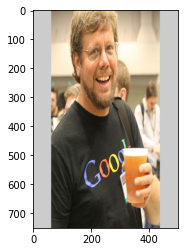

In [12]:
scaled_img = scale(guido, 0.75, 1.25)
plt.imshow(scaled_img)

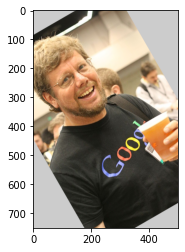

In [13]:
rotated_img = rotate(guido, -30)
plt.imshow(rotated_img)

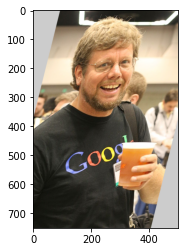

In [14]:
transvected_img = transvect(guido, -0.25)
plt.imshow(transvected_img)

In [ ]:
"""
视频流人脸识别
需要通过命令 pip install face-recognition 安装依赖项
"""
import face_recognition
import cv2
import numpy as np

# 获取摄像头
video_capture = cv2.VideoCapture(0)

# 加载图片获取脸部特征
obama_image = face_recognition.load_image_file("obama.jpg")
obama_face_encoding = face_recognition.face_encodings(obama_image)[0]
luohao_image = face_recognition.load_image_file("luohao.jpg")
luohao_face_encoding = face_recognition.face_encodings(luohao_image)[0]

# 保存脸部特征和对应的名字
known_face_encodings = [
    obama_face_encoding,
    luohao_face_encoding
]
known_face_names = [
    "Barack Obama",
    "Hao LUO"
]

face_locations = []
face_encodings = []
face_names = []
process_this_frame = True

while True:
    # 从视频中读取一帧数据
    ret, frame = video_capture.read()

    # 调整为原始尺寸的四分之一（加速处理）
    small_frame = cv2.resize(frame, (0, 0), fx=0.25, fy=0.25)

    # BGR转成RGB
    rgb_small_frame = small_frame[:, :, ::-1]

    if process_this_frame:
        # 找到所有的人脸位置和脸部特征保存在列表中
        face_locations = face_recognition.face_locations(rgb_small_frame)
        face_encodings = face_recognition.face_encodings(rgb_small_frame, face_locations)

        face_names = []
        for face_encoding in face_encodings:
            # 比较脸部特征
            matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
            name = "Unknown"

            # 找到匹配成功的下标对应的名字
            if True in matches:
               first_match_index = matches.index(True)
               name = known_face_names[first_match_index]

            # 通过距离判定最佳匹配并获取对应的名字
            # face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
            # best_match_index = np.argmin(face_distances)
            # if matches[best_match_index]:
            #    name = known_face_names[best_match_index]

            face_names.append(name)

    process_this_frame = not process_this_frame

    # 显示结果
    for (top, right, bottom, left), name in zip(face_locations, face_names):
        # 恢复正常的尺寸
        top, right, bottom, left = top * 4, right * 4, bottom * 4, left * 4
        # 绘制一个标识人脸的矩形框
        cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)
        # 绘制一个填写名字的矩形框
        cv2.rectangle(frame, (left, bottom - 35), (right, bottom), (0, 0, 255), cv2.FILLED)
        font = cv2.FONT_HERSHEY_DUPLEX
        cv2.putText(frame, name, (left + 6, bottom - 6), font, 1.0, (255, 255, 255), 1)
    
    cv2.imshow('Video', frame)
    
    # 按键盘上的q键退出窗口 
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

video_capture.release()
cv2.destroyAllWindows()